---
<a id="top"></a>
# Control Statements

## Overview
* [`if - else`](#if_else)
* [`match-case`](#match)
* Loops
  * [Iterating over a container data structure (for loop)](#forloop)
     * [Loop Control Statements](#control_statements)
  * [Conditional loop (while)](#while_loops)
* [Coffee Example](#coffee_example03)

Without control statements commands are just executed one statement after the other, line by line. Control statements allow for __conditional execution__ of commands (branching) or __iterated execution__ of code (loops).

---
<a name="if_else"></a>
## [Conditional branching `if - else`](#top)

`if` statements allow for the conditional execution of code. The keyword `if` is followed by a condition, which is evaluated. If the condition is `True`, the indented block following the `:`is executed. 

```Python
if <condition>:
    <Block of statements>
```

In [1]:
x = 10
if x > 5:
    print ('This is a big number!') # this code is only executed, if x is greater than 5
print("This statement is executed unconditionally")

This is a big number!
This statement is executed unconditionally


> __Observe__: In Python a block is indented (usually by 4 spaces / 1 tab). The block starts after the `:` in the line of the `if` and its condition. It ends with the next line, which is not indented.

The indented block can contain more than one statement.

In [2]:
x = 10
if x > 5:
    print('This is a big number!') # this code is only executed, if x is greater than 5
    print('Its value is', x)
print("This statement is executed unconditionally")

This is a big number!
Its value is 10
This statement is executed unconditionally


If you change the value of `x` to 5 or lower, only the uncoditional (not indented) print statement is executed.

To specify a reaction if a condition is not met (a _otherwise_ branch), we use the `else` block.

```Python
if <condition>:
    <Block of statements>
else:
    <Block of statements>
```

In [3]:
x = 4
if x > 5:
    print (x, 'is a big number!')
else:
    print (x, 'is a small number!') # this code is executed if x is not greater than 5

4 is a small number!


To add some conditions to the otherwise-branch, we use the `elif` block. <br>
This block is executed only, if the condition after `if` does not apply, but the condition after `elif` applies. `elif` is the short form of `else: if ...: ...`

```Python
if <condition>:
    <Block of statements>
elif <condition>:
    <Block of statements>
else:
    <Block of statements>
```

In [4]:
x = 15
if x > 20:
    print (x, 'is a very big number!') # this code is executed if x is greater than 20
elif x > 10:
    print (x, 'is a big number!') # this code is executed if x is greater than 10, but not greater than 20
else:
    print (x, 'is a small number!') # this code is executed if x is not greater than 10

15 is a big number!


We can also do the same with a *hierarchical* if-else, which is less readable and more error prone:

In [5]:
x = 15
if x > 20:
    print (x, 'is a very big number!')
else:
    if x > 10:
        print (x, 'is a big number!')
    else:
        print (x, 'is a small number!')

15 is a big number!


We are not limited to comparisons using `int`s and `float`s with `if` and `else` - we can use any function or expression that evaluates to a __boolean__, that is `True` or `False`.

> **Note**: The `Python` programming language allows the comparison of `str` in a very simple way. In many other programming languages special built-in functions have to be used for this purpose.

In [6]:
x = 10
command = 'increment'
if command =='increment' and x < 100:
    x = x + 1
print (x)

11


In [7]:
x = 10
command = 'nothing'
if command == 'increment':
    x = x + 1
print (x)

10


In [8]:
x = 10
command = 'nothing'
if command in ['increment', 'increase']:
    x = x + 1
    print (x)

> **Reminder**: Within `Python` tabs/whitespaces as indentation (from the beginning of the line) are very important! </br> 
Python does not put blocks in brackets (as Java or C-like languages do with curly braces { ... }). Instead a block is indented (usually by 4 spaces). The end of the block is defined by un-indentation! 

In [9]:
x = 10
if x > 20:
    print ("This is a big number")
print ("This is executed anyways!")

This is executed anyways!


In [10]:
x = 10
if x > 20:
    print ("This is a big number")
    print ("This is executed conditionally")

There must always be a code block after if/else. If you want to leave it empty, you can use the `pass`statement. It does (literally) nothing, but prevents a syntactic error. <br>
Therefore, the next code cell will produce an error and the second next not.

In [11]:
x = 20
if x > 10:
    # We will implement this later
    pass
else:
    print( "we don't come by here.")
print ("Here our code continues anyways...")

Here our code continues anyways...


**Error Message** `IndentationError: expected an indented block`

In [12]:
x = 20
if x > 10:
    # Here a code block must follow, otherwise an error message will be raised
else:
    print( "we don't come by here.")
print ("Here our code continues anyways...")

IndentationError: expected an indented block after 'if' statement on line 2 (2219333270.py, line 4)

---
<a id="match"></a>
## [`match-case`-statement](#top)

The `match-case`-statement is a powerfull way to check whether the result of a given expression matches a specific pattern. It is available since Python 3.10, so if you are using your local installation, you have to make sure that you have the right Python version. To install Python 3.10 with Anaconda, execute the following commands in the conda-prompt to create a new environment with the correct Python version (it will install many packages. This will take about 10 minutes):

```bash
conda create -n py310 python=3.10 anaconda
conda activate py310
```

Now let's have a look at the `match-case`-statement. The general syntax looks like this:

```python
match <Expression>:
    case <pattern 1> [<if guard>]:
        <block to execute if pattern 1 matches>
        
    case <pattern 2> [<if guard>]:
        <block to execute if pattern 2 matches>
       
    ...
    
    case <pattern n> [<if guard>]:
        <block to execute if pattern n matches>
        
    case _:  # wildcard pattern matching all other cases
        <block to execute if no pattern matches>
```

The match-statement evaluates the expression after the `match`-keyword which produces a value called the **subject**. This subject is then matched against the patterns of each case (after the `case`-keyword). The case-block corresponding to the first matching pattern is executed, all subsequent case statements are ignored. (We will see below how exactly subjects are matched to a pattern.) The guards after the patterns are optional if-conditions, which are evaluated after a pattern matches the subject. Only if this guard also evaluates to `True`, the corresponding block will be executed.

If you are familiar with a switch-case-statement from other languages you will recognize the similarities. But the purpose of the `match-case`-statement is not efficiency like in other languages. It's main advantage is that it comes with a very powerful pattern-matching mechanism, which makes it easy to create complex, but readable cases. Let’s have a closer look at how the `match-case` works.

### Patterns

A pattern specifies a structural constraint, that the subject needs to fulfill. It can restrict the subject to a single literal value, or define a more complex, compound structure. Especially the compound ones make the `match-case`-statement useful. The subject matches only against one pattern (the first one found from the top), even if a later pattern would also match the specification.

To demonstrate different types of patterns, we need some code elements, which can be used as a subject to match against different patterns. We will be using the following dictionaries, which represent pets:

In [ ]:
pet1 = {"type":"dog",
        "name":"rupert",
        "age":3,
        "toys":["ball", "rope"],
        "owner":"Katja"}

pet2 = {"type":"dog",
        "name":"bubbles",
        "age":"2",
        "toys":["bone", "teddy"]}

pet3 = {"type":"cat",
        "name":"humphrey",
        "age":2,
        "toys":["rope", "ball", "wool ball"],
        "owner":"Sergej"}

pet4 = {"type":"reptile",
        "name":"sven",
        "age":1,
        "toys":["rope"]}

#### Literal Patterns

Literal patterns are constants that only match exact values. We could use them to check the type of a given pet. Try to set the variable `pet` to the different pets we have defined above and check the output of the following code: 

In [ ]:
pet = pet1
print( pet )
print('-'*20)

if pet["type"] == "dog": 
    print(f'{pet["name"]} is a dog')
if pet["type"] == "cat": 
    print(f'{pet["name"]} is a cat')
print(f'... playing with {pet["toys"]}')

In [ ]:
# the same with the match-case statement
pet = pet4
print( pet )
print('-'*20)

match pet["type"]:
   case "dog":
       print(f'{pet["name"]} is a dog')
   case "cat":
       print(f'{pet["name"]} is a cat')
print(f'... playing with {pet["toys"]}')

#### Wildcard Patterns

The wildcard pattern, denoted by `_`,  matches any structure of the subject. It is often used as a fallback case, if no other pattern matches: 

In [ ]:
pet = pet4
print( pet )
print('-'*20)

match pet["type"]:
    case "dog":
        print(f'{pet["name"]} is a dog')
    case "cat":
        print(f'{pet["name"]} is a cat')
    case _:
        print("This animal is unknown in our pattern matching")

It always must be the last pattern specified, because it matches against any subject, so all other cases can't be matched:

In [ ]:
pet = pet4
print( pet )
print('-'*20)

match pet["type"]:
    case _:
        print("This animal is unknown in our pattern matching")
    case "dog":
        print(f'{pet["name"]} is a dog')
    case "cat":
        print(f'{pet["name"]} is a cat')

#### Sequence Patterns

Sequence patterns match to a sequence of items like a list or a tuple. For this you use comma separated sub-patterns, which may be enclosed within `[...]` or `(...)`. Each sub-pattern is matched against an element of the sequence while the whole pattern restricts the size and shape of the sequence. Thus, the pattern must exactly match the sequence of the target. It does not distinguish between list- and tuple-notation and it also allows for the unpacking syntax, i.e. `[1,2,3]` is equivalent to `(1,2,3)` and to `1,2,3`. Because this pattern contains (arbitrarily complex) sub-patterns we call it a _composed pattern_. Again, try to change the variable `pet` and predict the result. Specifically observe the result of `pet1`and `pet3`:

In [ ]:
pet = pet4
print( pet )
print('-'*20)

match pet["toys"]:
    case "ball","rope":       # can also be written as ["ball","rope"] or ("ball","rope") 
        print("The pet plays with a ball AND a rope.") 
    case "bone","teddy":     # can also be written as ["bone","teddy"] or ("bone","teddy") 
        print("The pet plays with a bone AND a teddy.")
    case ["rope"]:           # must be written as one-item-list! A structure is expected!
        print("The pet plays with a rope.")         
    case _:
        print("The pet plays with an unkown combination of toys.")

As you can see, even though `pet1` and `pet3` play with the same set of toys, `pet1` matches case 1 and `pet3` matches the fallback case. This is because we are restricting the seqeunce to the exact sequence we give in the pattern. If we want to make the pattern more general and restrict only one element, but leave the other items and the sequence size variable, we can use the `*`-character. This is only allowed **once** per pattern:

In [ ]:
pet = pet4
print( pet )
print('-'*20)

match pet["toys"]:
    case "ball",*_:             # can also be written as ["ball",*_] or ("ball",*_) 
        print("The first toy is a ball, there may be more.") 
    case "bone",*_:             # can also be written as ["bone",*_] or ("bone",*_) 
        print("The first toy is a bone, there may be more.")
    case "rope",*_:             # can also be written as ["bone",*_] or ("bone",*_) 
        print("The first toy is a rope, there may be more.")
    case _:
        print("The pet plays with an unkown first toy, or with no toys.")

#### Capture Patterns

The sequence patterns are still limited, because they match against a specific sequence of literals. The capture pattern allows for more general patterns, which bind values to positional variables. 

In [ ]:
pet = pet4
print( pet )
print('-'*20)

match pet["toys"]:
    # We now bound the first element in the toy-list to the variable "first" (and the second to the varaible "second").
    # With this, the pattern only restricts the amount of elements the seqeunce should have, but not the elements themselves:
    case [one]:
        print("The pet plays only with one toy:", one)
    case first, second:    
        print("The pet plays with two toys:")
        print("   1.", first)
        print("   2.", second)
    case first, second, third:                    
        print("The pet plays with three toys:")
        print("   1.", first)
        print("   2.", second)
        print("   3.", third)
    case _:
        print("The pet plays with less or more than three toys.")

#### AS Patterns

An AS pattern matches the pattern on the left of the `as`-keyword against the subject. If this fails, the AS pattern fails. Otherwise, the AS pattern binds the subject to the name on the right of the `as`-keyword and succeeds. As an example, we could check wether the age of a pet is stored as an integer or as a string. This can be done by matching against `int()` and `str()`. If this succeeds, we want to bind this age to a variable, such that we can use it in the code block:

In [ ]:
pet = pet1
print( pet )
print('-'*20)

match pet["age"]:
    case int() as age:             
        print("The age is stored as an integer with the value:", age)
    case str() as age:                    
        print("The age is stored as a string with the value:", age)
    case _:
        print("The age is stored in an unknown format")

#### OR Patterns

Another way to create composed patterns is the OR pattern. Two or more patterns are separated by vertical bars `|`. If any of an OR pattern’s sub-pattern matches the subject, the entire OR pattern succeeds. Moreover each sub-pattern must bind the same set of names, so that a name in a code block is never undefined:

In [ ]:
pet = pet1
print( pet )
print('-'*20)

match int(pet["age"]):
    case 3 | 1:             
        print("The pet is 1 or 3 years old ")
    case _:
        print("The pet is neither 1 nor 3 years old ")

#### Mapping Patterns

With mapping patterns we can restrict the shape of a mapping element like a dictionary. It uses the following syntax:

{key1: pattern1, key2: pattern2, ...}

A subject matches this pattern, if the following holds:
1. It is a mapping/dictionary
2. It has at least the set of provided keys 
3. All the sub-patterns match their corresponding values

We could restrict our pet-dictionaries in a way, that it has to have the key "owner":

In [ ]:
pet = pet3
print( pet )
print('-'*20)

match pet:
    case {"owner":"Katja"}:             
        print("The owner is Katja.")
    case {"owner":owner}:
        print(f"The owner is not Katja, but {owner}")
    case _:
        print("No owner known.")

In the first case the sub-pattern for the key `"owner"` is the literal pattern `"Katja"`. In the second case the sup-pattern is a capture pattern.

With the `**`-syntax we can bind the rest of the dictionary to a variable:

In [ ]:
pet = pet3
print( pet )
print('-'*20)

match pet:
    case {"owner":owner,**rest}:             
        print("The owner is:", owner)
        print("Besides, the pet has the following properties:")
        print(rest)
    case {"toys":toys,**rest}:             
        print("The toys are:", toys)
        print("Besides, the pet has the following properties:")
        print(rest)
    case {**rest}:
        print("There is no known owner of the pet")
        print("Besides, the pet has the following properties:")
        print(rest)

### Guards

A pattern can be extended by a guard (an additional if-clause) as we have seen in the beginning. With this we can restrict the shape of the subject in a more complex way. For example we could create a case, where the pet should be at the age of 2 (as string or integer), but the dictionary should not contain the "owner"-key:

In [ ]:
pet = pet2
print( pet )
print('-'*20)

match pet:
    case {"age":2,**rest} | {"age":"2",**rest} if not("owner" in rest.keys()):             
        print("The pet is 2 and does not have an owner")
        print("its properties are", rest )
    case _:
        print("The pet is not 2 or does have an owner")

### Conclusion on `match-case`

With the `match-case`-statement we are able execute complex structural pattern matching. With this it is not only possible to check wether a subject has a specific value, but with the combination of different nested patterns we can check if a complex code-element has a specific shape/structure.

<div class="learnmore"><b>Read more:</b> If you are interested in more details about structural pattern matching and more available patterns, we recommend reading the <a href="https://peps.python.org/pep-0634/">specifications</a>. <br>
There you can find the the correct syntax of all the patterns and how they work together.</div>

---
<a id="forloop"></a>
## [`for`-Loop](#top)

In the [previous module](02_DataStructures.ipynb) we introduced Python's built-in data structures and used a first example of a loop to iterate through the key-value pairs of a `dict`. But this is not the only purpose of loops.

In general, loops allow us to execute code multiple times. The values of the variables within the loop body, and thus the actual execution can be different in each iteration. 

There are two kind of loops: the `for` and `while` loop. The first is handy to iterate over all elements of a data structure like `list`s, `tuple`s, `str`s, or `dict`s., the second is handy for executing some code repeatedly as long as some condition holds. 

In [ ]:
first_names = ['John', 'Paul', 'George', 'Ringo']
for name in first_names:
    print(f"Hello {name}!")

> **Reminder**: See [Built-in functions on Data Structures](02_DataStructures.ipynb#functionsSet) for operation *in*.

This generic `for` loop iterates *over all items* of a container. This prevents counting and out-of-bounds errors we are used to from many other programming languages.

 A built-in function you will often see used in `for` loops is `range( )`, which returns an iterator of a sequence of integers specified by the given range. This is equivalent to using a for-counting-loop and thus, you can also use a counter for each of the items, if you need it:

<center><b>range(start, stop, step)</b></center>

| Parameter | Description | Occurence |
|----|----|----
| **`start`**| An integer number specifying at which position to start. Default is 0 | Optional
| **`stop`**| An integer number specifying at which position to stop (not included).  | Required
| **`step`**| An integer number specifying the incrementation. Default is 1  | Optional

In [ ]:
for i in range(2, 10):
    print (i)

In [ ]:
# the example above is the same as ...
for i in [2, 3, 4, 5, 6, 7, 8, 9]:
    print(i)

Here, using `i` as the counter of the iteration is another **naming convention**. If you want to nest for loops, you go on in the alphabet. Meaning the next loop counter would be `j`, then `k`, ...

In [ ]:
for i in [1,2,3]:
    for j in range(1,5):
        print('outer loop counter:', i, 'inner loop counter:', j)

Iterables start with index `0`. The range class thus can omit the starting index, which is then taken as `0`:

In [ ]:
for i in range(5): 
    print(i)

As with counting-for loops, the `range( )` class can specify a positive or negativ stepwidth:

In [ ]:
for i in range(10, -11, -2):   # range( from, to, step )
    print(i)

There are also other ways to iterate over an object with the for loop. <br>
The `enumerate( )` [built-in function](https://docs.python.org/3/library/functions.html#enumerate) allows you to iterate over a list and use an index:

In [ ]:
for index, name in enumerate(first_names):
    print(f"Name {index}: {name}")  # using format strings

> **Note:** In combination with the `for` loop, the first argument always corresponds to the index/counter and the second argument to the object content.

**Error Message** `IndexError: list index out of range`

In [ ]:
for index, name in enumerate(first_names):
    print (f"Current element: {first_names[index]}")
    print (f"Next element: {first_names[index+1]}")

> **Note:** One of the typical errors when using loops is `IndexError`. This means that you want to access an element of a list within the loop via indexing, which does not exist at all. <br> <br>
This type of error is one of the most common problems in all kind of computer programs! It is hence considered good style to avoid explicitely handling indices whenever possible. Often iterating over collections using constructs such as `for item in my_list` will accomplish what you need.

We cannot only loop over lists, but over any `iterable`. For example strings:

In [ ]:
x = "example"
for letter in x:
    print( letter )

But with loops, we can do more than just read data strucutes. We can also create some.

After creating an empty dictionary we add for each name in the `first_names` list the name as a key for the number of letters in the name to the `dict`.

In [ ]:
# As a simple example, lets create a dictionary, which maps each string in a list to its length:
name_lengths = {}
for name in first_names:
    name_lengths[name] = len(name)
name_lengths

We can also loop over the contents of a `dictionary` using the `items()` function:

In [ ]:
for name, length in name_lengths.items( ):
    print(f'{name} -> {length}')

> **Note:** If the `items` function is combined with a `for` loop, the first argument always corresponds to key of the dictionary and the second argument to the corresponding value.

<a name="control_statements"></a>
### [Loop Control Statements](#top)
Within loops, you can also use further specific control statements at certain points. This makes it possible to end the loop prematurely or to skip an element:

| Operation | Description | 
|----|--
| **`break`**| Exit loop when an external condition is triggered. 
| **`continue`** | Skip part of a loop in which an external condition is triggered.

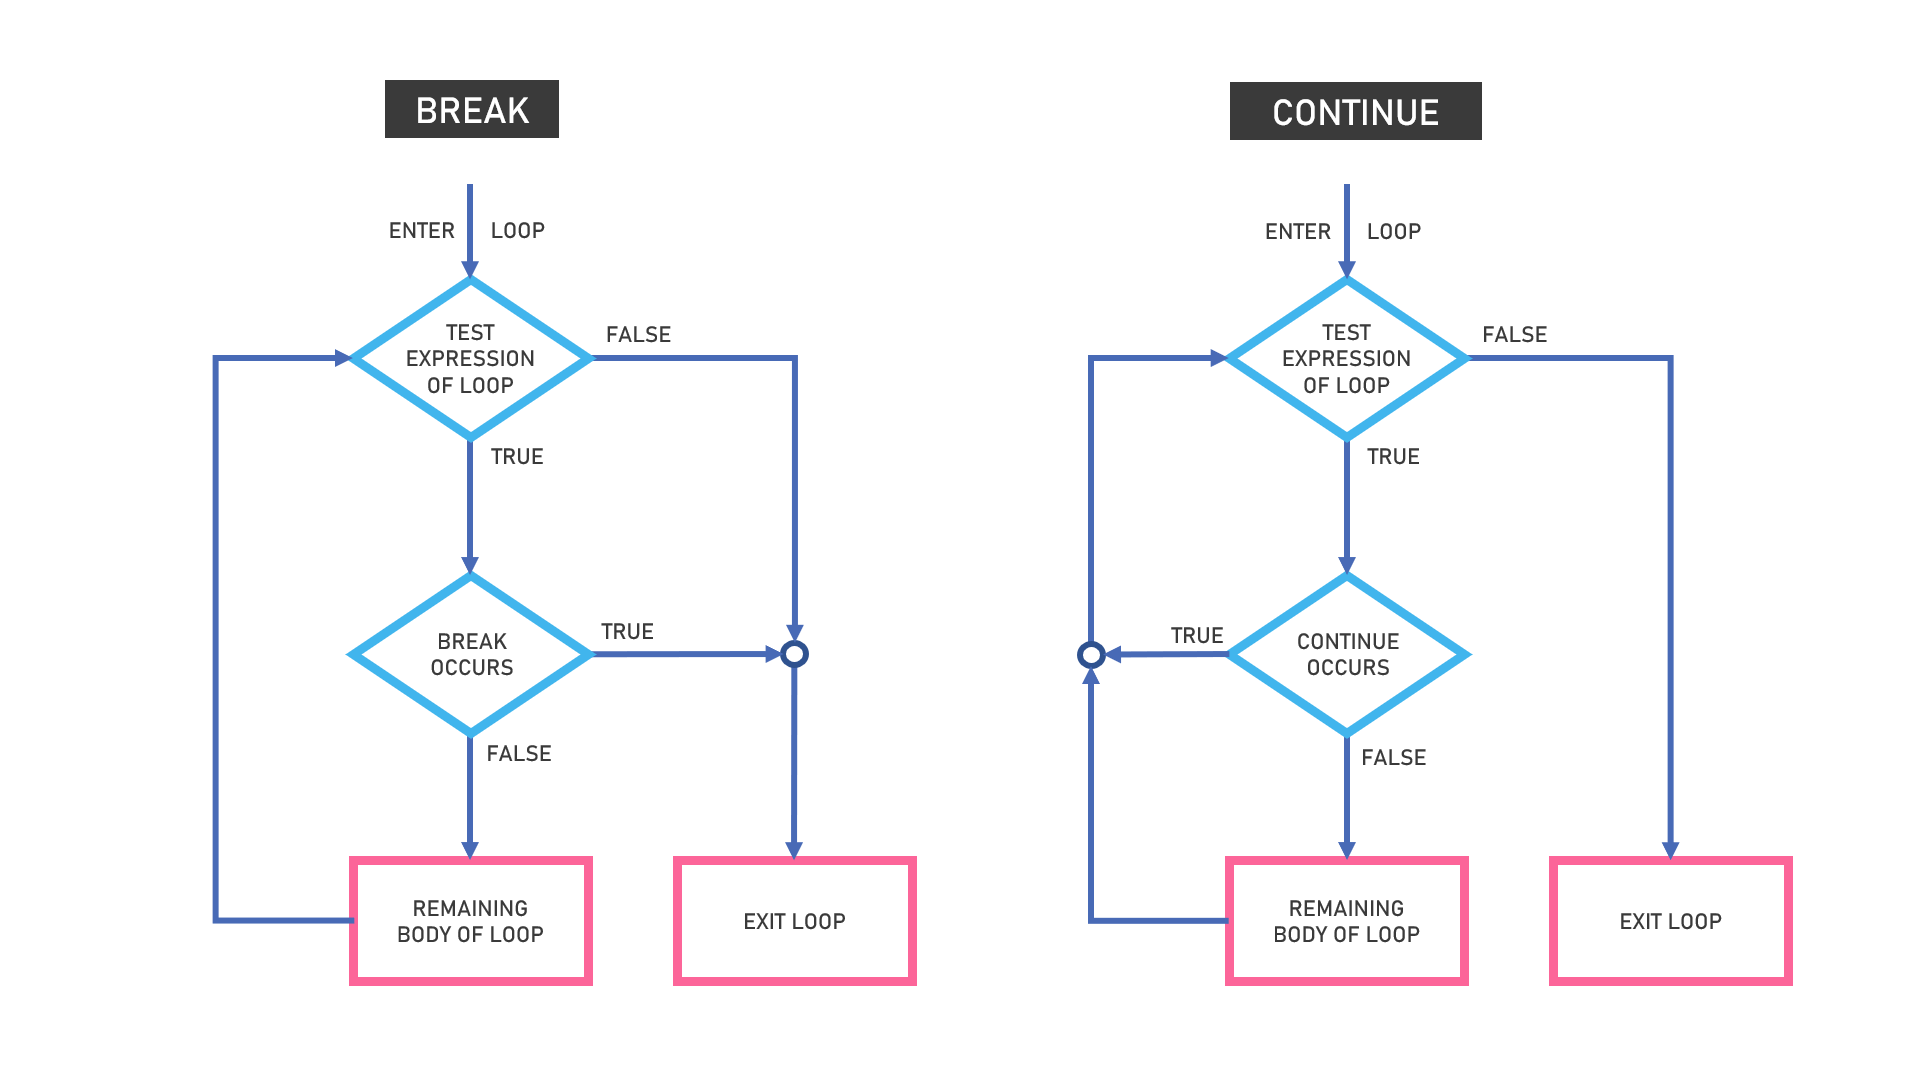

In [ ]:
for index, name in enumerate(first_names):
    print(f"Name {index}: {name}")

In [ ]:
for index, name in enumerate(first_names):
    if name == "George":
        break       # stop before George is handled
    print(f"Name {index}: {name}")

In [ ]:
for index, name in enumerate (first_names):
    if name == "George":
        continue    # skip George
    print(f"Name {index}: {name}")

---
<a id="while_loops"></a>
## [`while`-loops](#top)
`While` (__conditional__) loops are an alternative to a `for` (__counting__) loop. The statements within the loop are executed, as long as the specified condition holds. 

In [ ]:
x = 1
while x > 0 and x < 500:
    x *= 2
    print(x)

You can use `break` just like in `for` loops, some `while` loops entirely rely on that!

In [ ]:
x = 1
while True:
    if x > 100:
        break
    x *= 2
    print(x)

>**Note**: The `while` loops runs as long as its condition evaluates to `True`. With `True` as the condition, the `while` loop is called _endless loop_ as it needs another condition within the loop and the use of `break` or an external interaction (stopping the Python interpreter with the <i class="fa-stop fa"></i> icon) to end the loop.

You can also `continue` a while loop without completing the rest of the code in the body of the loop, similar to a `for` loop.

In [ ]:
x = 1
while True:
    if x > 100:
        break
    x *= 2
    if x == 16:
        continue # do not print 16
    print(x)

In [ ]:
a, b = 0, 1 # short version of two assignments
while a < 1000:
    print(a, end=', ') # print delimiter after the element
    a, b = b, a+b # short version has the advantage that right side is evaluated before both assignements => no tmp
print(a)

The same loop to compute the Fibonacci numbers in most other languages (Java, ...)

In [ ]:
a = 0 
b = 1
while a < 1000:
    print(a, end=', ')
    tmp = a # we need to temporarily store the value of a
    a = b
    b = tmp + b # now we still can use the 'old' value of a
print(a)

As an alternative (typical Pythonian) you can create a list of the Fibonacchi numbers:

In [ ]:
fibos = [0, 1]
while fibos[-1] < 1000: 
    fibos.append(fibos[-1]+fibos[-2]) # append the sum of the last two elements
print(fibos)

> **Reminder:** [Reverse indexing of lists](02_DataStructures.ipynb#reverseIndexingList)

---
<a name="coffee_example03"></a>
## [Coffee Example](#top)
With this knowledge of control structures, we can advance the computation of the price for a coffee from the first module again. 

In [ ]:
price_coffee = 1.20
price_milk = 0.30
price_sugar = 0.10

print('Configure your coffee:')
want_milk = bool(int(input('Do you want milk (1 = Yes, 0 = No): ')))
want_sugar = bool(int(input('Do you want sugar (1 = Yes, 0 = No): ')))

to_pay = price_coffee + int(want_milk) * price_milk + int(want_sugar) * price_sugar
print(f'One coffee costs € {to_pay:4.2f}')

We want to improve the input of _Yes_ and _No_. Using numbers and the type conversion to `int` and `bool` leads to wanting milk or sugar if anything else but 0 is entered. Now we want to actually test for the input _Yes_:

In [ ]:
price_coffee = 1.20
price_milk = 0.30
price_sugar = 0.10

print('Configure your coffee:')
# Remove type conversions and input hints
want_milk = input('Do you want milk: ')
want_sugar = input('Do you want sugar: ')

# Check if the input was 'Yes'
if want_milk == 'Yes':
    want_milk = True
else:
    want_milk = False

# Or even shorter:
want_sugar = want_sugar == 'Yes'

to_pay = price_coffee + int(want_milk) * price_milk + int(want_sugar) * price_sugar
print(f'One coffee costs € {to_pay:4.2f}')

Because of the dynamic typing of `Python`, we can store the result of the user input evaluation in the same variable.
This works fine. But what if the user writes _yes_ or _YES_ instead of _Yes_? 
We have to find a way to ignore upper cases. 
To do this, we use the `lower` function:

In [ ]:
price_coffee = 1.20
price_milk = 0.30
price_sugar = 0.10

print('Configure your coffee:')
want_milk = input('Do you want milk: ')
want_sugar = input('Do you want sugar: ')

# Check if the input in lower cases was 'yes'
want_milk = want_milk.lower() == 'yes'
want_sugar = want_sugar.lower() == 'yes'

to_pay = price_coffee + int(want_milk) * price_milk + int(want_sugar) * price_sugar
print(f'One coffee costs € {to_pay:4.2f}')

Execute the code above and test some inputs or prevent to need to re-execute the code everytime by adding a `while` loop (to be finished with the stop button of the Python interpreter):

In [ ]:
price_coffee = 1.20
price_milk = 0.30
price_sugar = 0.10

while True:
    print('Configure your coffee:')
    want_milk = input('Do you want milk: ')
    want_sugar = input('Do you want sugar: ')

    # Check if the input in lower cases was 'yes'
    want_milk = want_milk.lower() == 'yes'
    want_sugar = want_sugar.lower() == 'yes'

    to_pay = price_coffee + int(want_milk) * price_milk + int(want_sugar) * price_sugar
    print(f'One coffee costs € {to_pay:4.2f}')
    # Add a visual separator of the single input and output groups
    print('===========================')

With the match-case statement we can easily introduce new sorts of coffee and create a more complex case-distinction:

In [ ]:
price_coffee = 1.20
price_cappuccino = 1.90
price_latte = 1.90
price_espresso = 1.75
price_milk = 0.30
price_sugar = 0.10

while True:
    print('Configure your coffee:')
    coffee_type = input('Which coffee do you want? We have: Cappuccino, Latte Macchiato, Espresso and Coffee\n')
    
    match coffee_type.lower():
        case "coffee":
            want_milk = input('Do you want milk: ')
            want_sugar = input('Do you want sugar: ')
            want_milk = want_milk.lower() == 'yes'
            want_sugar = want_sugar.lower() == 'yes'
            to_pay = price_coffee + int(want_milk) * price_milk + int(want_sugar) * price_sugar
            
        case "espresso":
            want_double = input("Do you want a double espresso?: ")
            to_pay = price_espresso
            if(want_double.lower() == 'yes'):
                coffee_type = "double-espresso"
                to_pay = to_pay + price_espresso
            
        case "latte macchiato":
            to_pay = price_latte
            
        case "cappuccino":
            to_pay = price_cappuccino
            
        case "stop" | "none":
            break
            
        case _:
            print("Your input could not be processed, perhaps there was a typo. Restart machine...")
            print('===========================')
            continue
    
    print(f'One coffee costs € {to_pay:4.2f}')
    # Add a visual separator of the single input and output groups
    print('===========================')

---
# Summary
Within this lecture you have been introduced to the different control statements in the python programming language. This includes in particular:
* `if` .. `else`: conditional execution of a block of statements
* `match-case`: pattern matching
* `for` loops without explicitly counting => sequential data structures (`iterables`), 
* `while` loops for repeating sth as long as some condtion holds
* `break`, `continue`: Aborting a loop prematurely or skipping iterations of a loop

In the [next lecture](04_Functions.ipynb) you will learn how to program your own functions in Python.